# LİNER REGRESYON

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
dataset = pd.read_csv('Kidem_ve_Maas_VeriSeti.csv')
dataset.head()

,Kidem,Maas
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [10]:
dataset.shape

(30, 2)

# Veri Setini Öznitelik ve Hedef olarak Ayırmak

Şimdi x öznitelikler matrisini ve y hedef değişken vektörünü oluşturalım.

In [11]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [12]:
X.shape

(30, 1)

In [13]:
y.shape

(30,)

 x ve y birbirinden farklı veri yapısını barındırıyor. Birisi matris, diğeri vektör. Her ne kadar x öznitelikler matrisi tek sütundan oluşsa ve vektör olarak kabul edilebilse bile veri yapısı olarak bir matristir. Başka bir deyişle satır ve sütun olarak koordinatlanabilir. Şayet X = dataset.iloc[:,0] deseydik yine de X’e ilk sütun olan Kidem sütununu atamış olurduk ancak veri yapısı vektör olurdu. Bu sebeple biz y = dataset.iloc[:,:-1] dedik. Yani datasetin hepsini al ama -1 indeksli sütunu (Maas) hariç tut dedik. y için ise dataset’ten 1 numaralı indekse(Maas) sahip sütunu tut getir dedik. Yani 1 ve -1 indeksi aslında aynı sütuna işaret ediyor.

In [16]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [17]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

# Değişkenlerimizi Eğitim ve Test Olmak Üzere İkiye Bölmek

In [19]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 0)

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Modeli Eğitme

X_train ve buna karşılık gelen y_train verisiyle modelimizi eğiteceğiz. Bunun için scikit-learn kütüphanesinden LinearRegression sınıfıimport edilir

In [20]:

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor nesnesi oluşturuldu. Şimdi fit() metodunu kullanarak model  eğitilir. Parametre olarak yukarıda oluşturuan X_train, y_train eğitim setleri olarak kullanılır

In [21]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Böylece basit lineer nesne oluşturmuş ve model eğitilmiş olur.

# Model Üzerinde Tahminler Yapma

Şimdi sıra eğitilen modele girdiler verelrek bakalım bize nasıl sonuçlar üretecek. Bunun için daha önce hazırlanan X_test verileri kulllanılacaktır

In [22]:
y_pred = regressor.predict(X_test)

In [23]:
y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

# Regresyon Grafiği Çizmek ve Yorumlamak

matplotlib.pyplot kütüphanesini kullanarak kurulan modeli, tahminleri, regresyon doğrusunu ve veri noktalarını (data points) görülür. Önce eğitim veri setinin (gerçek veriler) dağılma diyagramı çizilir: 

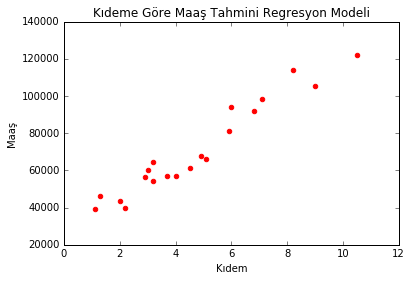

In [24]:
plt.scatter(X_train, y_train, color = 'red')
plt.title('Kıdeme Göre Maaş Tahmini Regresyon Modeli')
plt.xlabel('Kıdem')
plt.ylabel('Maaş')
plt.show()

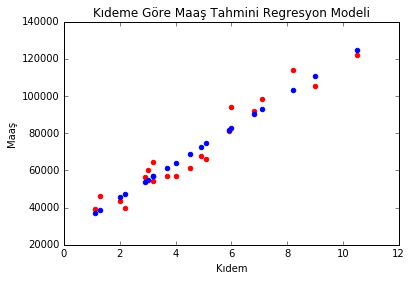

In [25]:
plt.scatter(X_train, y_train, color = 'red')
modelin_tahmin_ettigi_y = regressor.predict(X_train)
plt.scatter(X_train, modelin_tahmin_ettigi_y, color = 'blue')
plt.title('Kıdeme Göre Maaş Tahmini Regresyon Modeli')
plt.xlabel('Kıdem')
plt.ylabel('Maaş')
plt.show()

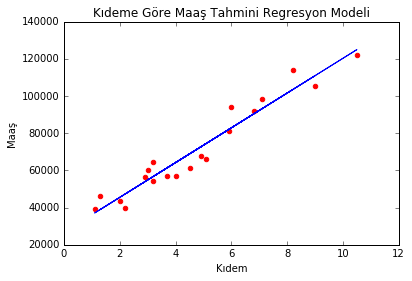

In [26]:
plt.scatter(X_train, y_train, color = 'red')
modelin_tahmin_ettigi_y = regressor.predict(X_train)
plt.plot(X_train, modelin_tahmin_ettigi_y, color = 'blue')
plt.title('Kıdeme Göre Maaş Tahmini Regresyon Modeli')
plt.xlabel('Kıdem')
plt.ylabel('Maaş')
plt.show()

# Katsayılarımız Ne çıkmış

y = b0 + b1 * x

Burada, b0 ve b1, eğitim verilerinden tahmin etmemiz gereken katsayılardır.
Katsayılar bilindikten sonra, bu denklemi yeni x girdileri verildiğinde y için çıkış değerlerini tahmin etmek için kullanabiliriz.

In [27]:
regressor.coef_

array([9345.94244312])

In [28]:
regressor.intercept_

26816.192244031183

# Kendi Değerlerimizi Vererek Tahminde Bulunalım

In [29]:
regressor.predict(7)

array([92237.78934589])

In [30]:
regressor.predict(11)

array([129621.55911838])